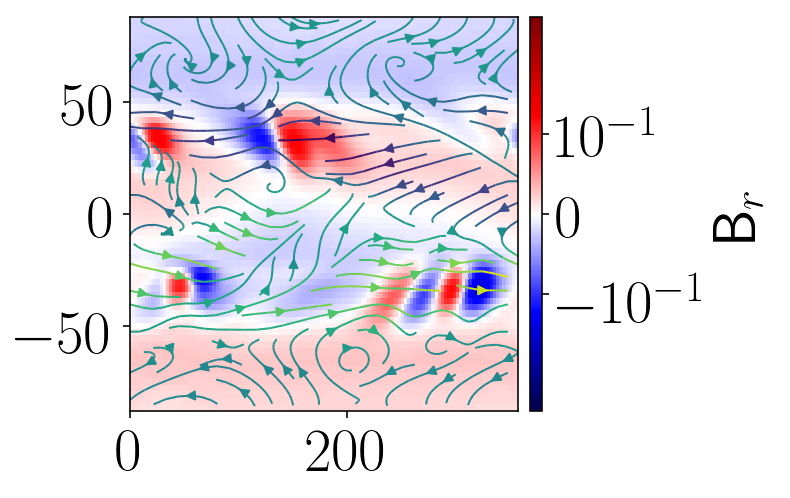

b_err 4.358294933270347e-05


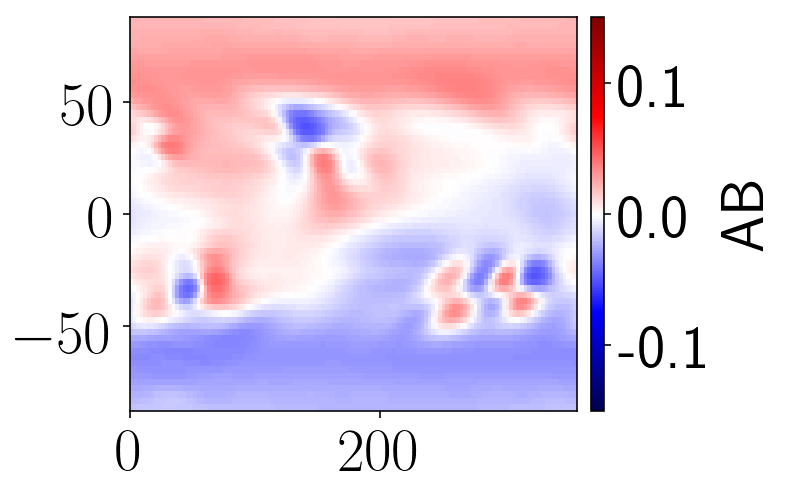

ab_err 9.551287443723934e-06


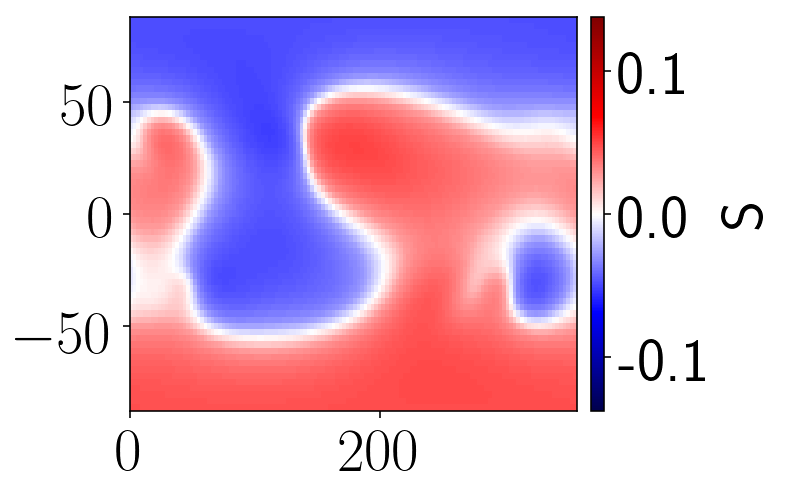

s_err 8.301649473613664e-06


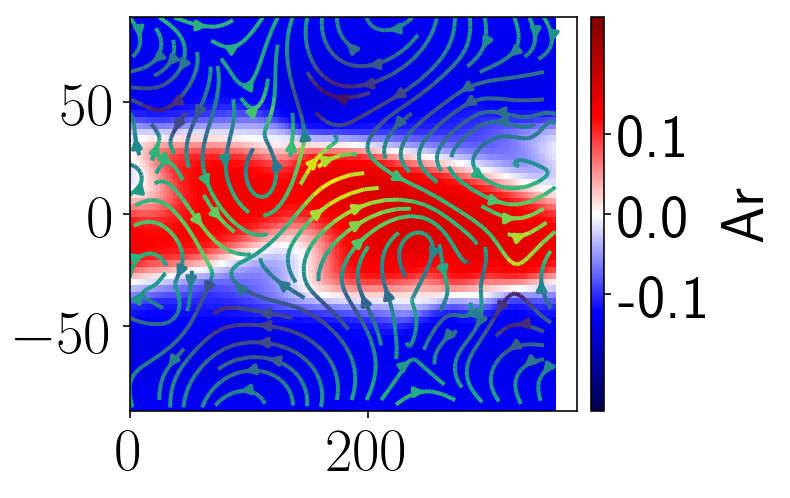

t_err 0.000166876012111426


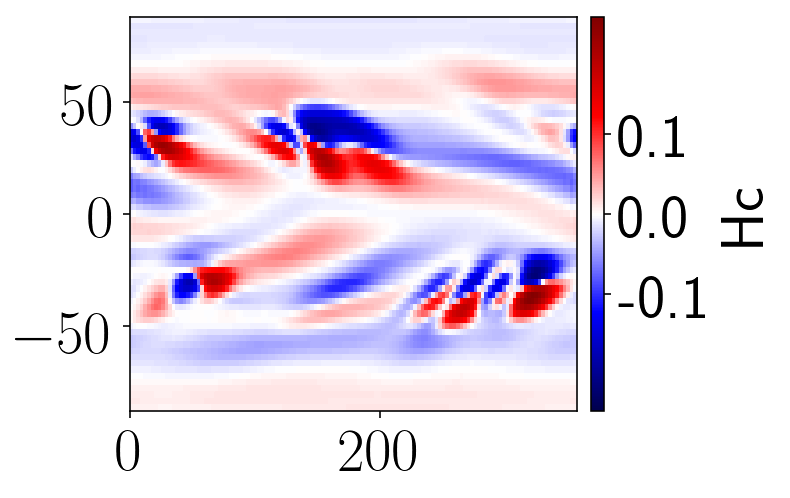

hc_err 0.00106036895577053 7954


In [5]:
from numpy import *
from numpy.fft import *
from scipy import *
from scipy.interpolate import *
from pylab import *


from scipy.integrate import *
import matplotlib.cm as cmap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs

import matplotlib.pyplot as plt
params = {'axes.labelsize': 24,
          'font.size': 24,
          'legend.fontsize': 30,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'savefig.dpi':32,
          'text.usetex': True}
plt.rcParams.update(params)
from pyshtools import *
from pyshtools.expand import SHGLQ,SHExpandGLQ,MakeGridGLQ,SHExpandDH,MakeGridDH,SHMultiply
#from pyshtools.rotate import djpi2,SHRotateRealCoef,SHRotateCoef
from pyshtools.shio import SHCilmToCindex,SHCindexToCilm,SHrtoc,SHctor
from pyshtools.spectralanalysis import spectrum,cross_spectrum,SHAdmitCorr,SHConfidence

from astropy.io import fits
Br=fits.getdata('Br.fits',ext=0)
Bf=fits.getdata('Bf.fits',ext=0)
Bp=fits.getdata('Bp.fits',ext=0)

ss=fits.getdata('S.fits',ext=0)
tt=fits.getdata('Ar.fits',ext=0)


from initrn import *
Nphg=Nlr*2+1
phig=arange(Nphg)*2*pi/Nphg
zero=xch[-1::-1]
mu=linspace(-1,1,len(zero))

f = RectBivariateSpline(mu,phig,Br,kx=5,ky=5)
brn = f(xch,phig)

f = RectBivariateSpline(mu,phig,Bf,kx=5,ky=5)
bfn = f(xch,phig)

f = RectBivariateSpline(mu,phig,Bp,kx=5,ky=5)
bpn = f(xch,phig)


xg,yg=meshgrid(phig*180/pi,90-arccos(zero)*180/pi)
#x0,y0=meshgrid(phig*180/pi,90-arccos(mu)*180/pi)
cnilm=zeros((2,Nlr+1,Nmr+1))


#################
#################
brr=brn#tensordot(mean(brn,axis=1),ones(Nphg),0)
cilm = SHExpandGLQ(brr[-1::-1,:],wch,zero, norm=4)
ccilm=SHrtoc(cilm)
brco=(ccilm[0,nk,mk]+1j*ccilm[1,nk,mk]);
s0r=-dot(ms_0,brco)
ath=1j*dot(msf,s0r);aff=dot(mst,s0r)    

cilm = SHExpandGLQ(bfn[-1::-1,:],wch,zero, norm=4)
ccilm=SHrtoc(cilm)
bfco=ccilm[0,nk,mk]+1j*ccilm[1,nk,mk];

cilm = SHExpandGLQ(bpn[-1::-1,:],wch,zero, norm=4)
ccilm=SHrtoc(cilm)
bpco=(ccilm[0,nk,mk]+1j*ccilm[1,nk,mk]);

t0r=dot(ms_0, dot(mst1,bfco)+1j*dot(msf,bpco))
fsr=dot(ms_0, 1j*dot(msf,bfco)-dot(mst1,bpco))

cilm=zeros((2,Nlr+1,Nmr+1))
brcc=-dot(ms0,s0r)
cilm[0,nk,mk]=real(brcc);cilm[1,nk,mk]=imag(brcc) 
rcilm=SHctor(cilm)
brc=(rcilm)
brnr = MakeGridGLQ(rcilm,zero,norm=4)

cilm=zeros((2,Nlr+1,Nmr+1))
cilm[0,nk,mk]=real(s0r);
cilm[1,nk,mk]=imag(s0r) 
src=SHctor(cilm)
srm = MakeGridGLQ(src,zero,norm=4) #,lmax_calc=Nlr-10)

cilm=zeros((2,Nlr+1,Nmr+1))
cilm[0,nk,mk]=real(t0r);
cilm[1,nk,mk]=imag(t0r) 
arc=SHctor(cilm)
ar = MakeGridGLQ(arc,zero,norm=4) 


cilm = SHExpandGLQ(ar,wch,zero, norm=4)
ccilm=SHrtoc(cilm)
curb=-dot(ms0,ccilm[0,nk,mk]+1j*ccilm[1,nk,mk]);
cilm[0,nk,mk]=real(curb);
cilm[1,nk,mk]=imag(curb); 
curlc=SHctor(cilm)
curlr = MakeGridGLQ(curlc,zero,norm=4)


cilm=zeros((2,Nlr+1,Nmr+1))
cilm[0,nk,mk]=real(fsr);
cilm[1,nk,mk]=imag(fsr) 
fsrc=SHctor(cilm)
fsrm = MakeGridGLQ(fsrc,zero,norm=4) #,lmax_calc=Nlr-10)

   
cilm=zeros((2,Nlr+1,Nmr+1))
cilm[0,nk,mk]=real(ath);cilm[1,nk,mk]=imag(ath) 
rcilm=SHctor(cilm)
apc=(rcilm)
ap = MakeGridGLQ(apc,zero,norm=4)#,lmax_calc=Nlr*2//3)

cilm=zeros((2,Nlr+1,Nmr+1))
cilm[0,nk,mk]=real(bpco);cilm[1,nk,mk]=imag(bpco) 
bpc=SHctor(cilm)
bpnr = MakeGridGLQ(bpc,zero,norm=4)#,lmax_calc=Nlr*2//3)


cilm=zeros((2,Nlr+1,Nmr+1))
cilm[0,nk,mk]=real(aff);cilm[1,nk,mk]=imag(aff) 
afc=SHctor(cilm)
af = MakeGridGLQ(afc,zero,norm=4)#,lmax_calc=Nlr*2//3)


cilm=zeros((2,Nlr+1,Nmr+1))
cilm[0,nk,mk]=real(bfco);cilm[1,nk,mk]=imag(bfco) 
bfc=SHctor(cilm) 
bfnr = MakeGridGLQ(bfc,zero,norm=4)#,lmax_calc=Nlr*2//3)


   
hln=ar*brnr+af*bfnr+ap*bpnr
hc=brnr*curlr


hcm=fits.getdata('Hc.fits',ext=0)
hmm=fits.getdata('Hm.fits',ext=0)

f = RectBivariateSpline(mu,phig,hcm,kx=5,ky=5)
hcn = f(xch,phig)[-1::-1,:]
f = RectBivariateSpline(mu,phig,hmm,kx=5,ky=5)
hmn = f(xch,phig)[-1::-1,:]

import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

plt.figure()
CS2=plt.pcolor(xg,yg,brnr,norm=colors.SymLogNorm(linthresh=.1, linscale=1,
        vmin=-1,vmax=1),cmap=cmap.seismic)
plt.streamplot(xg[:,:],yg[:,:],(bfnr)[:,:],(bpnr)[:,:],color=bfnr, linewidth=1,density=1)
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "3%", pad="3%")
CB=plt.colorbar(CS2, cax=cax,ticks=[-.1,0,.1])
CB.set_label('B$_{r}$',fontsize=30)
plt.tight_layout()
plt.show()
f = RectBivariateSpline(mu,phig,Br,kx=5,ky=5)
bro = f(xch,phig)[-1::-1,:]

print('b_err',std(bro-brnr))


plt.figure()
CS2=plt.pcolor(xg,yg,hln,norm=colors.SymLogNorm(linthresh=.005, linscale=1,
        vmin=-1,vmax=1),cmap=cmap.seismic)
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "3%", pad="3%")
CB=plt.colorbar(CS2, cax=cax,ticks=[-.1,0,.1],format='%.1f')
CB.set_label('AB',fontsize=30)
plt.tight_layout()
plt.show()
print('ab_err',std(hln-hmn))




plt.figure()
CS2=plt.pcolor(xg,yg,srm,norm=colors.SymLogNorm(linthresh=.001, linscale=1,
        vmin=-1,vmax=1),cmap=cmap.seismic)
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "3%", pad="3%")
CB=plt.colorbar(CS2, cax=cax,ticks=[-.1,0,.1],format='%.1f')
CB.set_label('S',fontsize=30)
plt.tight_layout()
plt.show()

f = RectBivariateSpline(mu,phig,ss,kx=5,ky=5)
sn = f(xch,phig)[-1::-1,:]
print('s_err',std(sn-srm))

plt.figure()
CS2=plt.pcolormesh(xg,yg,ar,norm=colors.SymLogNorm(linthresh=.1, linscale=1,
        vmin=-1,vmax=1),cmap=cmap.seismic)
plt.streamplot(xg[:,:],yg[:,:],(af)[:,:],(ap)[:,:],color=af, linewidth=2,density=1) #/sqrt(bf**2+bp**2)/sqrt(bf**2+bp**2)
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "3%", pad="3%")
CB=plt.colorbar(CS2, cax=cax,ticks=[-.1,0,.1],format='%.1f')
CB.set_label('Ar',fontsize=30)
plt.tight_layout() 
plt.show()

f = RectBivariateSpline(mu,phig,tt,kx=5,ky=5)
tn = f(xch,phig)[-1::-1,:]

print('t_err',std(tn-ar))

plt.figure()
CS2=plt.pcolor(xg,yg,hc,norm=colors.SymLogNorm(linthresh=.1, linscale=1,
        vmin=-1,vmax=1),cmap=cmap.seismic)
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "3%", pad="3%")
CB=plt.colorbar(CS2, cax=cax,ticks=[-.1,0,.1],format='%.1f')
CB.set_label('Hc',fontsize=30)
plt.tight_layout()
plt.show()

print('hc_err',std(hc-hcn),argmax((hc-hcn).ravel()))